In [1]:
import nltk
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns

In [3]:
tr=pd.read_csv("rating_review")

In [4]:
tr

Unnamed: 0  Rating                                        Full_Review
0               0       5  good product in this price range.. value for m...
1               1       5                                       Nice product
2               2       2                         Bad this is waste products
3               3       1           Just horrible product don,t think to buy
4               4       3                                           Very bad
...           ...     ...                                                ...
22645        2995       4  OK. I had searched for so many answers but did...
22646        2996       3  It is a very good router. The range is good fo...
22647        2997       4  A very good product for normal to heavy user. ...
22648        2998       2  GENUINE REVIEW AFTER USING A MONTH......\n>If ...
22649        2999       2  This Product seems not listed under the D-link...

[22650 rows x 3 columns]

In [5]:
tr.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
tr

Rating                                        Full_Review
0           5  good product in this price range.. value for m...
1           5                                       Nice product
2           2                         Bad this is waste products
3           1           Just horrible product don,t think to buy
4           3                                           Very bad
...       ...                                                ...
22645       4  OK. I had searched for so many answers but did...
22646       3  It is a very good router. The range is good fo...
22647       4  A very good product for normal to heavy user. ...
22648       2  GENUINE REVIEW AFTER USING A MONTH......\n>If ...
22649       2  This Product seems not listed under the D-link...

[22650 rows x 2 columns]

In [7]:
tr.shape

(22650, 2)

In [8]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22650 entries, 0 to 22649
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rating       22650 non-null  int64 
 1   Full_Review  22650 non-null  object
dtypes: int64(1), object(1)
memory usage: 354.0+ KB


In [9]:
tr.columns

Index(['Rating', 'Full_Review'], dtype='object')

In [10]:
tr.dtypes

Rating          int64
Full_Review    object
dtype: object

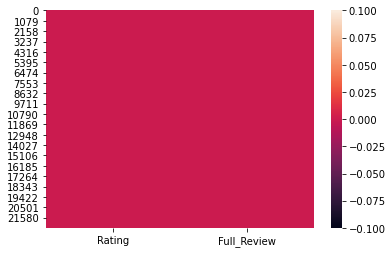

In [11]:
sns.heatmap(tr.isnull())

In [12]:
tr.head()

Rating                                        Full_Review
0       5  good product in this price range.. value for m...
1       5                                       Nice product
2       2                         Bad this is waste products
3       1           Just horrible product don,t think to buy
4       3                                           Very bad

In [13]:
tr.tail()

Rating                                        Full_Review
22645       4  OK. I had searched for so many answers but did...
22646       3  It is a very good router. The range is good fo...
22647       4  A very good product for normal to heavy user. ...
22648       2  GENUINE REVIEW AFTER USING A MONTH......\n>If ...
22649       2  This Product seems not listed under the D-link...

In [14]:
tr["Rating"].value_counts()

5    12475
4     5755
1     1865
3     1640
2      915
Name: Rating, dtype: int64

In [15]:
tr.index

RangeIndex(start=0, stop=22650, step=1)

In [16]:
tr["Rating"].unique()

array([5, 2, 1, 3, 4], dtype=int64)

In [17]:
tr.nunique()

Rating           5
Full_Review    109
dtype: int64

In [18]:
tr.describe().T

count      mean       std  min  25%  50%  75%  max
Rating  22650.0  4.150552  1.226062  1.0  4.0  5.0  5.0  5.0

In [19]:
tr["length"]=tr.Full_Review.str.len()
tr.head()

Rating                                        Full_Review  length
0       5  good product in this price range.. value for m...      52
1       5                                       Nice product      12
2       2                         Bad this is waste products      26
3       1           Just horrible product don,t think to buy      40
4       3                                           Very bad       8

In [20]:
tr['Full_Review']=tr['Full_Review'].str.lower()

In [21]:
tr.head()

Rating                                        Full_Review  length
0       5  good product in this price range.. value for m...      52
1       5                                       nice product      12
2       2                         bad this is waste products      26
3       1           just horrible product don,t think to buy      40
4       3                                           very bad       8

In [22]:
# remove email address
tr['Full_Review']=tr['Full_Review'].str.replace(r"^.+@[^\.].*\.[a-z]{2,}$",
                                               'emailaddress')
# remove web address
tr['Full_Review']=tr['Full_Review'].str.replace(r"^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$",
                                               'webaddress')
# remove money symbol
tr['Full_Review']=tr['Full_Review'].str.replace(r"£|\$",'dollers')

# remove rupees symbol
tr['Full_Review']=tr['Full_Review'].str.replace(r"\₹",'rupees')

# remove 10 digit phone number
tr['Full_Review']=tr['Full_Review'].str.replace(r"^\(?[\d]{3}\)?[\s-]?[\d]{3}?[\s-]?[\d]{4}$",
                                               'phonenumber')
# remove the any number
tr['Full_Review']=tr['Full_Review'].str.replace(r"\d+(\.\d+)?",'number')

# remove any punctuation
tr['Full_Review']=tr['Full_Review'].str.replace("[^\w\d\s]",' ')

# replace whitespace between with a single space
tr['Full_Review']=tr['Full_Review'].str.replace(r"\s+",' ')

# replace leading and trailing whitespace
tr['Full_Review']=tr['Full_Review'].str.replace(r"^\s+|\s+?$",'')

In [23]:
tr.head()

Rating                                       Full_Review  length
0       5  good product in this price range value for money      52
1       5                                      nice product      12
2       2                        bad this is waste products      26
3       1          just horrible product don t think to buy      40
4       3                                          very bad       8

In [24]:
import re

In [25]:
def remove_emojis(x):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF"  
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF"  
        u"\U00002500-\U00002BEF"  
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', x)

In [26]:
tr['Full_Review']=tr['Full_Review'].apply(lambda x : remove_emojis(x))

In [27]:
tr['Full_Review']

0         good product in this price range value for money
1                                             nice product
2                               bad this is waste products
3                 just horrible product don t think to buy
4                                                 very bad
                               ...                        
22645    ok i had searched for so many answers but didn...
22646    it is a very good router the range is good for...
22647    a very good product for normal to heavy user i...
22648    genuine review after using a month if you are ...
22649    this product seems not listed under the d link...
Name: Full_Review, Length: 22650, dtype: object

In [28]:
from nltk.corpus import stopwords

In [29]:
stop_words=set(stopwords.words("english") + ['u','ur','4','2','doin','dont','ure','im'])

tr['Full_Review']=tr['Full_Review'].apply(lambda x: ' '.join(
                                          p for p in x.split() if p not in stop_words))

In [30]:
tr['Full_Review'][22645]

'ok searched many answers get answered even going reviews anyways bought dirnumber unit aug number try answer questions looking maybe hep others also went model specifically since numberghz penetration thru walls numberghz higher speed antennas number primarily wanted repeater main keralavision broadband internet connected huawei wifi router built read'

In [31]:
sns.countplot(x='Rating',data=tr)
print(tr['Rating'].value_counts())

5    12475
4     5755
1     1865
3     1640
2      915
Name: Rating, dtype: int64


In [32]:
tr["clean_length"]=tr.Full_Review.str.len()
tr.head()

Rating                           Full_Review  length  clean_length
0       5  good product price range value money      52            36
1       5                          nice product      12            12
2       2                    bad waste products      26            18
3       1            horrible product think buy      40            26
4       3                                   bad       8             3

In [33]:
print('original length',tr.length.sum())
print('clean length',tr.clean_length.sum())

original length 6425030
clean length 4537395


In [34]:
from wordcloud import WordCloud

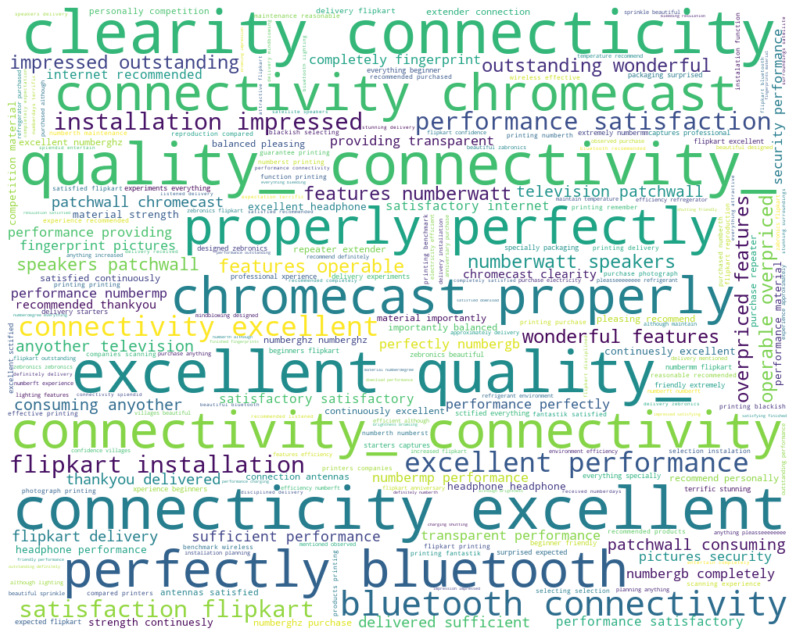

In [35]:
plt.figure(figsize=(14,14))
wc=WordCloud(max_words=500,width=1000,height=800,min_word_length=8,
             background_color='white').generate(" ".join(tr[tr.Rating == 5].Full_Review))
plt.axis('off')
plt.imshow(wc,interpolation="bilinear")

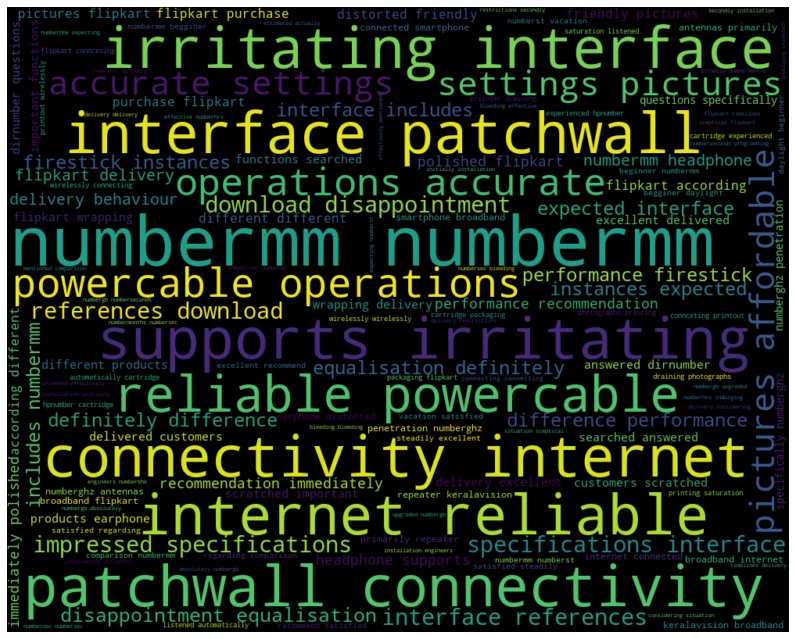

In [36]:
plt.figure(figsize=(14,14))
wc=WordCloud(max_words=300,width=1000,height=800,min_word_length=8,
             background_color='black').generate(" ".join(tr[tr.Rating == 4].Full_Review))
plt.axis('off')
plt.imshow(wc,interpolation="bilinear")

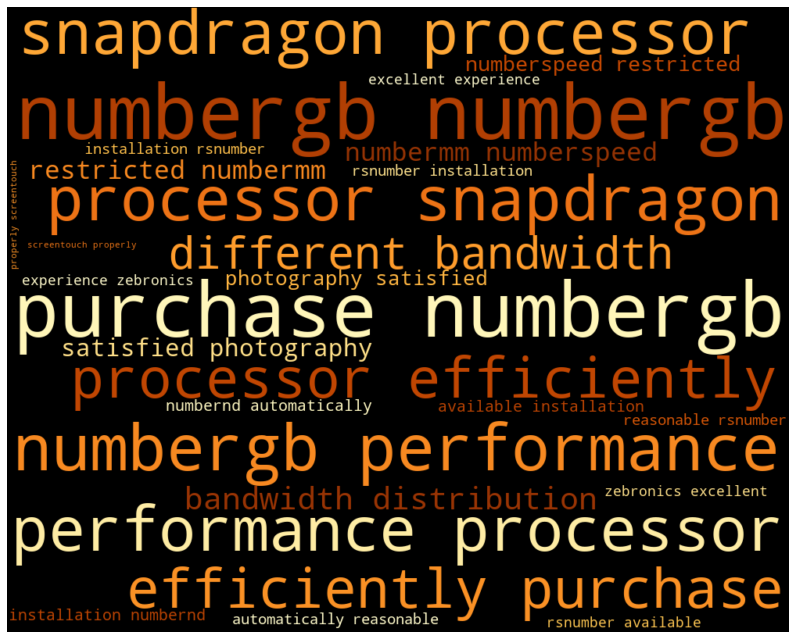

In [37]:
plt.figure(figsize=(14,14))
wc=WordCloud(max_words=200,width=1000,height=800,min_word_length=8,
             colormap='YlOrBr').generate(" ".join(tr[tr.Rating == 3].Full_Review))
plt.axis('off')
plt.imshow(wc,interpolation="bilinear")

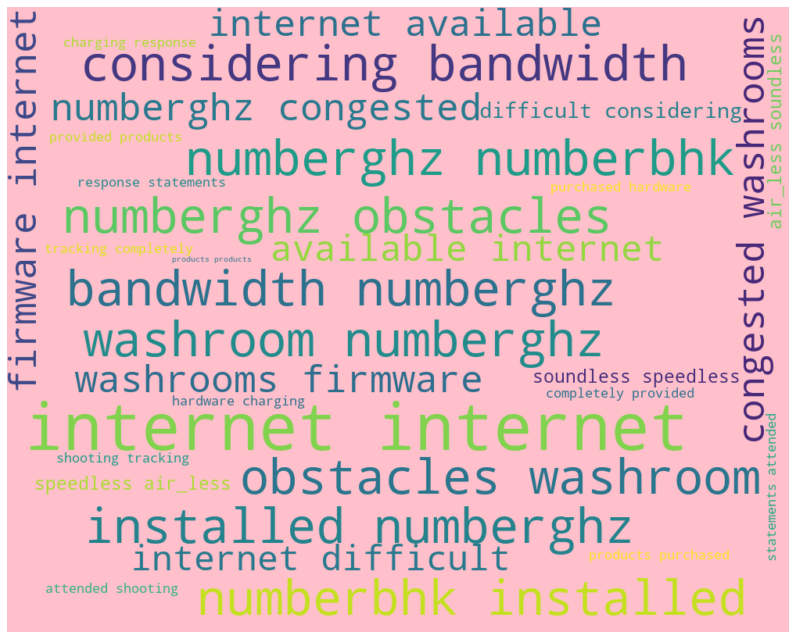

In [38]:
plt.figure(figsize=(14,14))
wc=WordCloud(max_words=400,width=1000,height=800,min_word_length=8,
             background_color='pink').generate(" ".join(tr[tr.Rating == 2].Full_Review))
plt.axis('off')
plt.imshow(wc,interpolation="bilinear")

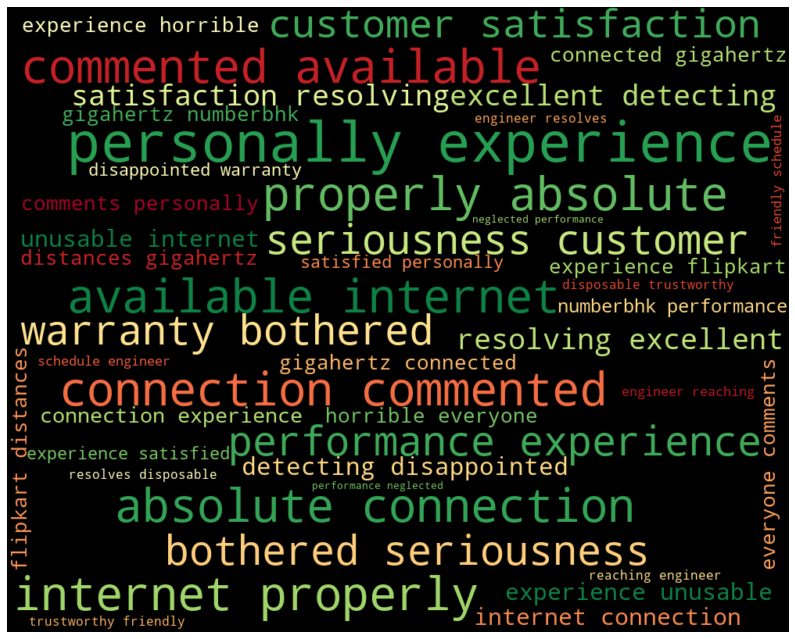

In [39]:
plt.figure(figsize=(14,14))
wc=WordCloud(max_words=500,width=1000,height=800,min_word_length=8,
             colormap='RdYlGn').generate(" ".join(tr[tr.Rating == 1].Full_Review))
plt.axis('off')
plt.imshow(wc,interpolation="bilinear")

In [40]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [41]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [42]:
sia=SentimentIntensityAnalyzer()

In [43]:
tr.Full_Review

0                     good product price range value money
1                                             nice product
2                                       bad waste products
3                               horrible product think buy
4                                                      bad
                               ...                        
22645    ok searched many answers get answered even goi...
22646    good router range good number ghz number ghz l...
22647    good product normal heavy user use smart tv pl...
22648    genuine review using month buying router consi...
22649    product seems listed link india site see firmw...
Name: Full_Review, Length: 22650, dtype: object

In [44]:
empty=[]
for l in tr["Full_Review"]:
    vs=sia.polarity_scores(l)
    empty.append(vs)

tr_senti=pd.DataFrame(empty)
tr_senti.head()

neg    neu    pos  compound
0  0.000  0.430  0.570    0.6486
1  0.000  0.263  0.737    0.4215
2  0.863  0.137  0.000   -0.7430
3  0.538  0.462  0.000   -0.5423
4  1.000  0.000  0.000   -0.5423

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [46]:
tdi=TfidfVectorizer()
features=tdi.fit_transform(tr["Full_Review"])
x=features
y=tr["Rating"]

In [59]:
print(x.shape)

(22650, 1115)


In [60]:
print(y.shape)

(22650,)


In [47]:
from sklearn.tree import DecisionTreeClassifier
maxAcc=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
    print('Best Accuracy is ',maxAcc,'on Random_state ',maxRS)

Best Accuracy is  0.9916114790286976 on Random_state  1
Best Accuracy is  0.9916114790286976 on Random_state  1
Best Accuracy is  0.9916114790286976 on Random_state  1
Best Accuracy is  0.9916114790286976 on Random_state  1
Best Accuracy is  0.9929359823399558 on Random_state  5
Best Accuracy is  0.9929359823399558 on Random_state  5
Best Accuracy is  0.9929359823399558 on Random_state  5
Best Accuracy is  0.9929359823399558 on Random_state  5
Best Accuracy is  0.9929359823399558 on Random_state  5
Best Accuracy is  0.9929359823399558 on Random_state  5
Best Accuracy is  0.9929359823399558 on Random_state  5
Best Accuracy is  0.9929359823399558 on Random_state  5
Best Accuracy is  0.9929359823399558 on Random_state  5
Best Accuracy is  0.9929359823399558 on Random_state  5
Best Accuracy is  0.9929359823399558 on Random_state  5
Best Accuracy is  0.9929359823399558 on Random_state  5
Best Accuracy is  0.9929359823399558 on Random_state  5
Best Accuracy is  0.9929359823399558 on Random_s

Best Accuracy is  0.9932303164091244 on Random_state  97
Best Accuracy is  0.9932303164091244 on Random_state  97
Best Accuracy is  0.9932303164091244 on Random_state  97
Best Accuracy is  0.9932303164091244 on Random_state  97
Best Accuracy is  0.9932303164091244 on Random_state  97
Best Accuracy is  0.9932303164091244 on Random_state  97
Best Accuracy is  0.9932303164091244 on Random_state  97
Best Accuracy is  0.9932303164091244 on Random_state  97
Best Accuracy is  0.9932303164091244 on Random_state  97
Best Accuracy is  0.9932303164091244 on Random_state  97
Best Accuracy is  0.9932303164091244 on Random_state  97
Best Accuracy is  0.9932303164091244 on Random_state  97
Best Accuracy is  0.9932303164091244 on Random_state  97
Best Accuracy is  0.9932303164091244 on Random_state  97
Best Accuracy is  0.9932303164091244 on Random_state  97
Best Accuracy is  0.9932303164091244 on Random_state  97
Best Accuracy is  0.9932303164091244 on Random_state  97
Best Accuracy is  0.99323031640

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.9910228108903606
[[ 576    0    0    0    0]
 [   0  291    0    0    0]
 [   0    0  446    0    0]
 [   0    0    0 1703   61]
 [   0    0    0    0 3718]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       576
           2       1.00      1.00      1.00       291
           3       1.00      1.00      1.00       446
           4       1.00      0.97      0.98      1764
           5       0.98      1.00      0.99      3718

    accuracy                           0.99      6795
   macro avg       1.00      0.99      0.99      6795
weighted avg       0.99      0.99      0.99      6795



In [49]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9910228108903606
[[ 576    0    0    0    0]
 [   0  291    0    0    0]
 [   0    0  446    0    0]
 [   0    0    0 1703   61]
 [   0    0    0    0 3718]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       576
           2       1.00      1.00      1.00       291
           3       1.00      1.00      1.00       446
           4       1.00      0.97      0.98      1764
           5       0.98      1.00      0.99      3718

    accuracy                           0.99      6795
   macro avg       1.00      0.99      0.99      6795
weighted avg       0.99      0.99      0.99      6795



In [50]:
from sklearn.naive_bayes import MultinomialNB
mn=MultinomialNB()
mn.fit(x_train,y_train)
predmn=mn.predict(x_test)
print(accuracy_score(y_test,predmn))
print(confusion_matrix(y_test,predmn))
print(classification_report(y_test,predmn))

0.9886681383370125
[[ 576    0    0    0    0]
 [   0  291    0    0    0]
 [   0    0  436   10    0]
 [   0    0    0 1697   67]
 [   0    0    0    0 3718]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       576
           2       1.00      1.00      1.00       291
           3       1.00      0.98      0.99       446
           4       0.99      0.96      0.98      1764
           5       0.98      1.00      0.99      3718

    accuracy                           0.99      6795
   macro avg       1.00      0.99      0.99      6795
weighted avg       0.99      0.99      0.99      6795



In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.9910228108903606
[[ 576    0    0    0    0]
 [   0  291    0    0    0]
 [   0    0  446    0    0]
 [   0    0    0 1703   61]
 [   0    0    0    0 3718]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       576
           2       1.00      1.00      1.00       291
           3       1.00      1.00      1.00       446
           4       1.00      0.97      0.98      1764
           5       0.98      1.00      0.99      3718

    accuracy                           0.99      6795
   macro avg       1.00      0.99      0.99      6795
weighted avg       0.99      0.99      0.99      6795



In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()                                                      
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.9910228108903606
[[ 576    0    0    0    0]
 [   0  291    0    0    0]
 [   0    0  446    0    0]
 [   0    0    0 1703   61]
 [   0    0    0    0 3718]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       576
           2       1.00      1.00      1.00       291
           3       1.00      1.00      1.00       446
           4       1.00      0.97      0.98      1764
           5       0.98      1.00      0.99      3718

    accuracy                           0.99      6795
   macro avg       1.00      0.99      0.99      6795
weighted avg       0.99      0.99      0.99      6795



In [53]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(dt,x,y,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.7435761589403973


In [54]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(svc,x,y,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.8314348785871963


In [55]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(mn,x,y,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.7234878587196467


In [56]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(rfc,x,y,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.8356291390728476


In [57]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(knn,x,y,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.7612362030905077


In [58]:
import joblib
joblib.dump(svc,'SVCratingmodel.pkl')

['SVCratingmodel.pkl']